# Explore here

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

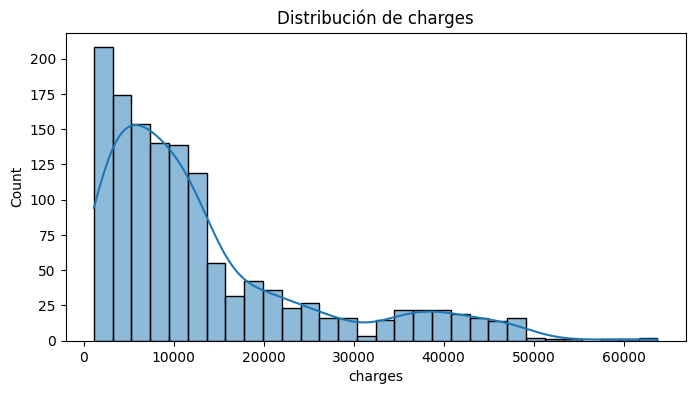

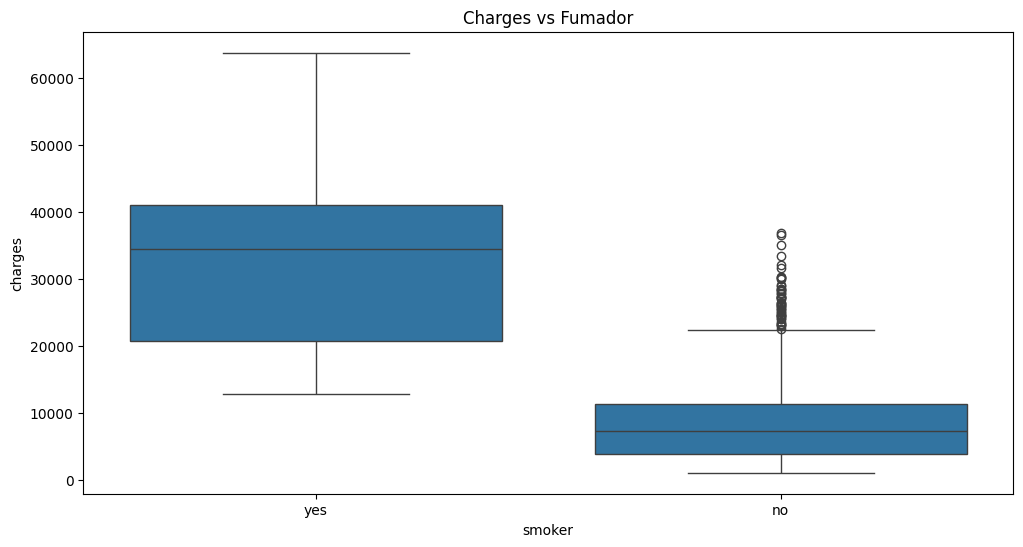

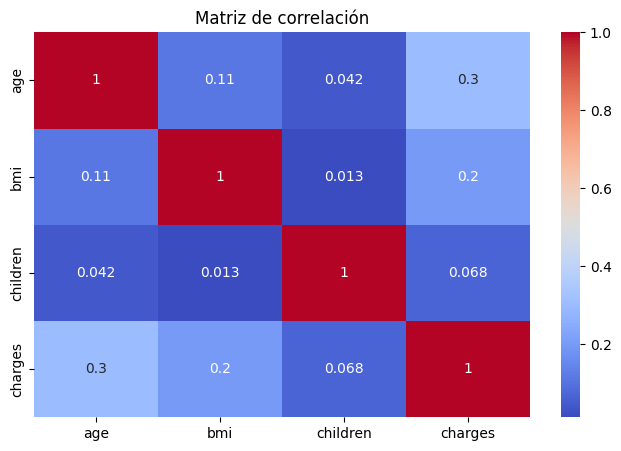

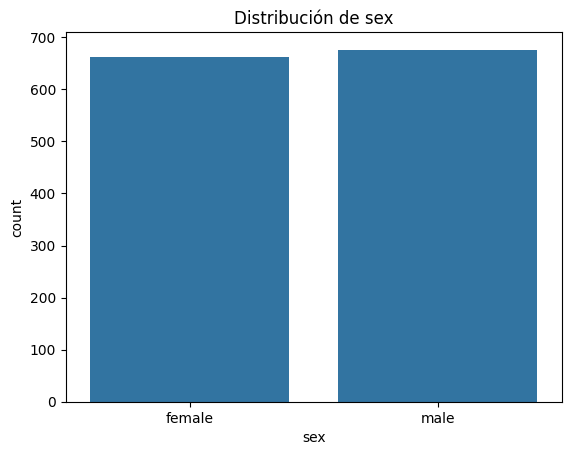

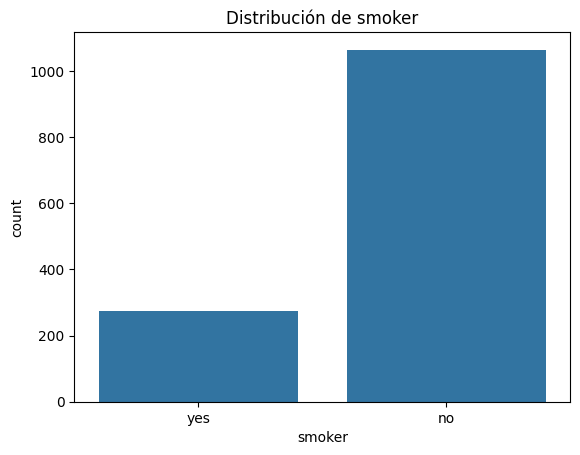

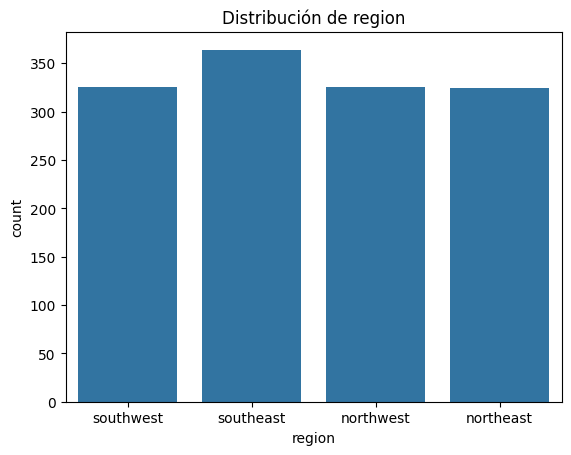

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)

# Vista general
print(df.head())
print(df.info())
print(df.describe())

# Verificar valores nulos
print("Valores nulos:\n", df.isnull().sum())

# Distribución del target (charges)
plt.figure(figsize=(8, 4))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribución de charges')
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges vs Fumador')
plt.show()

# Correlación entre variables numéricas
df_num = df.select_dtypes(include=['number'])
plt.figure(figsize=(8, 5))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Análisis de variables categóricas
for col in ['sex', 'smoker', 'region']:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()



In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Variables y target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 33596915.85136145
RMSE: 5796.284659276273
R² Score: 0.7835929767120724


In [32]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R²:", r2_score(y_test, ridge_pred))

# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, lasso_pred))


Ridge R²: 0.7832830144988215
Lasso R²: 0.7835376351805539


In [33]:
##Ridge (con GridSearchCV)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir el rango de alphas
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch con validación cruzada (cv=5)
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Mejor alpha y rendimiento
print("Mejor alpha (Ridge):", ridge_cv.best_params_['alpha'])
print("Mejor R² (Ridge, validación cruzada):", ridge_cv.best_score_)

# Evaluación final en test
ridge_best = ridge_cv.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
print("R² en test (Ridge):", r2_score(y_test, y_pred_ridge))


Mejor alpha (Ridge): 1
Mejor R² (Ridge, validación cruzada): 0.7331464298909902
R² en test (Ridge): 0.7832830144988215


In [34]:
#Lasso (con GridSearchCV)
from sklearn.linear_model import Lasso

# Definir el rango de alphas
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso(max_iter=10000)  # Aumentamos iteraciones para converger
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

print("Mejor alpha (Lasso):", lasso_cv.best_params_['alpha'])
print("Mejor R² (Lasso, validación cruzada):", lasso_cv.best_score_)

lasso_best = lasso_cv.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
print("R² en test (Lasso):", r2_score(y_test, y_pred_lasso))


Mejor alpha (Lasso): 100
Mejor R² (Lasso, validación cruzada): 0.7343337999270757
R² en test (Lasso): 0.7794166946394485
